In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df = pd.read_csv("data/preprocessed/v1_movies.csv")
movies_df.head()

,wikipedia_id,freebase_id,title,languages,countries,genres,keywords,release_date,runtime,plot_summary,year_release_date,cold_war_side,character_western_bloc_representation,character_eastern_bloc_representation,western_bloc_values,eastern_bloc values,theme
0,4213160.0,/m/0bq8q8,$,['English'],['United States of America'],"['Drama', 'Comedy', 'Action', 'Thriller', 'Hei...",NaN,1971-12-17,119.0,"Set in Hamburg, West Germany, several criminal...",1971,Western,"['Joe Collins', 'American bank security consul...","['Sarge', 'corrupt U.S. Army sergeant', 'value...","['Cunning', 'heroism', 'cleverness', 'survival...","['Ruthlessness', 'violence', 'greed', 'betraya...","['Heist', 'crime', 'betrayal', 'survival', 'te..."
1,NaN,NaN,"$1,000 on the Black","['Deutsch', 'Italiano']","['Italy', 'Germany']",['Western'],NaN,1966-12-18,104.0,Johnny Liston has just been released from pris...,1966,Western,"['Johnny Liston', 'justice', 'redemption', 'he...","['Sartana', 'tyranny', 'betrayal', 'antagonist']","['Justice', 'redemption', 'individualism', 'pe...","['Tyranny', 'fear', 'betrayal', 'oppression']","['Revenge', 'self-discovery', 'moral conflict'..."
2,NaN,NaN,"$10,000 Blood Money",NaN,['Soviet Union'],"['Drama', 'Western']",NaN,1967-01-01,NaN,Hired by a Mexican landowner to rescue his dau...,1967,None,['None'],['None'],['None'],['None'],"['Betrayal', 'Greed', 'Bounty Hunter', 'Heist']"
3,NaN,NaN,"$100,000 for Ringo",['Italiano'],['Italy'],"['Drama', 'Western']","['spaghetti western', 'whipping']",1965-11-18,98.0,A stranger rides into Rainbow Valley where he'...,1965,None,['None'],['None'],['None'],['None'],"['Western', 'Frontier', 'Stranger', 'Rivalry',..."
4,2250713.0,/m/06z7m4,'68,['English'],"['United States of America', 'Hungary']","['Drama', 'Coming of age', 'Family Drama', 'Pe...",NaN,1988-01-01,98.0,The father escaped the Soviet invasion of Buda...,1988,None,['None'],['None'],['None'],['None'],"['Gay rights', 'counterculture', 'family confl..."


# Genre Analysis

## Bar Plots


C:\Users\karim\AppData\Local\Temp\ipykernel_22168\3132527322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


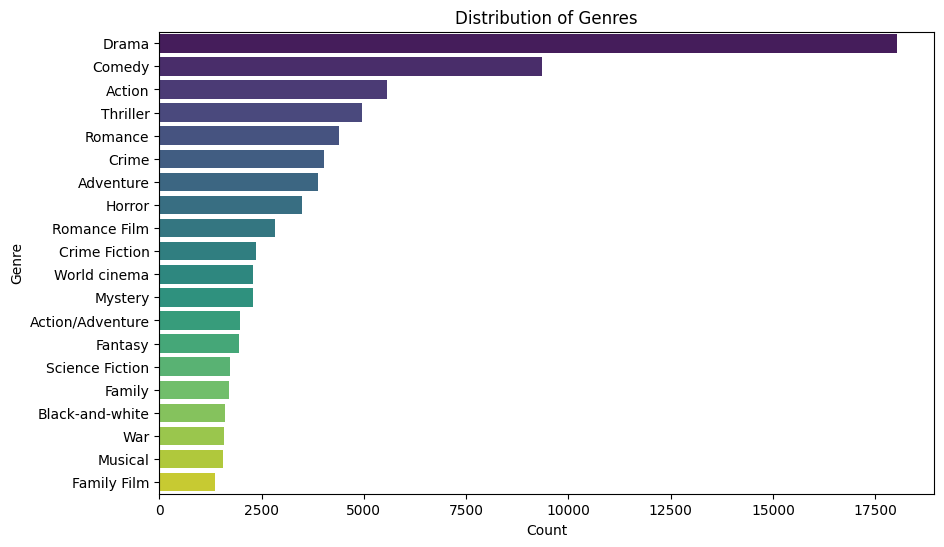

In [3]:
import ast

genres_df = pd.DataFrame()

# change genres column from str to array
genres_df["genres"] = movies_df["genres"].fillna("[]").apply(ast.literal_eval)

genre_counts = genres_df["genres"].explode().value_counts().head(20)


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [4]:
print(movies_df["cold_war_side"].value_counts())
print()
print(movies_df["countries"].value_counts().head(5))

cold_war_side
None         22787
Western       3585
Eastern       3404
Western        327
Eastern         49
None,           44
None             6
Western,         2
Name: count, dtype: int64

countries
['United States of America']    10029
['Soviet Union']                 5522
['Russia']                       2497
['India']                        1799
['United Kingdom']               1558
Name: count, dtype: int64


In [5]:
Western_countries = [
    "United States of America",
    "United Kingdom",
    "France",
    "Italy",
    "Ireland",
    "Australia",
    "New Zealand",
    "Canada",
]

Eastern_countries = ["Soviet Union", "Russia"]

Western_movies = movies_df[
    movies_df["countries"].str.contains("|".join(Western_countries), case=False)
]
Eastern_movies = movies_df[
    movies_df["countries"].str.contains("|".join(Eastern_countries), case=False)
]

In [6]:
movies_df[movies_df["cold_war_side"] == "Eastern"]

,wikipedia_id,freebase_id,title,languages,countries,genres,keywords,release_date,runtime,plot_summary,year_release_date,cold_war_side,character_western_bloc_representation,character_eastern_bloc_representation,western_bloc_values,eastern_bloc values,theme
1688,23814175.0,/m/06_x9tq,Among Grey Stones,['Russian'],['Soviet Union'],"['History', 'Drama']",NaN,1983-01-01,88.0,This film is based on a short story of Vladimi...,1983,Eastern,['None'],"['Vladimir Korolenko', 'personal loss', 'Easte...",['None'],['None'],"['Childhood', 'loss', 'memory', 'emotional jou..."
4690,NaN,NaN,Chess of the Wind,NaN,['Soviet Union'],"['Drama', 'Mystery', 'Thriller']",NaN,1976-01-01,NaN,The first lady of a noble house has died and n...,1976,Eastern,['None'],"['Conflict between heirs', 'greed', 'ambition'...","['Bourgeois values', 'power struggle', 'wealth...",['None'],"['Inheritance', 'family conflict', 'betrayal',..."
9333,NaN,NaN,Give Me a Complaints Book,NaN,['Lithuania'],['Comedy'],NaN,1965-01-01,NaN,Journalist Nikitin writes an article for a pop...,1965,Eastern,"['Nikitin', 'values of social critique and acc...",['None'],"['Social improvement', 'modernization', 'and p...","['State control', 'lack of individual expressi...","['Social critique', 'modernization', 'dissatis..."
9401,NaN,NaN,God's Crooked Lines,NaN,['Ukraine'],"['Drama', 'Mystery', 'Thriller']",NaN,1983-01-01,NaN,"Detective Alicia Gould, investigating the murd...",1983,Eastern,['None'],"['Alicia Gould', 'courage', 'determination', '...","['justice', 'truth-seeking', 'uncovering corru...","['totalitarianism', 'control', 'oppressive sys...","['murder mystery', 'mental asylum', 'investiga..."
9568,NaN,NaN,Gospodin za edin den,NaN,['Soviet Union'],"['Drama', 'Comedy']",NaN,1983-01-01,NaN,"This film is a comedy about a poor man, named ...",1983,Eastern,['None'],"['Poorco', 'struggles against poverty', 'commo...",['None'],"['Social justice', 'sacrifice', 'resilience', ...","['Poverty', 'social atmosphere', 'Bulgaria', '..."
9643,NaN,NaN,Great Transport,"['English', 'Srpski']","['United States of America', 'Serbia']",['War'],"['world war ii', 'partisan']",1983-07-04,134.0,This WW2 epic was one of the last movies of th...,1983,Eastern,['None'],"['Partizans', 'Resilience', 'Unity', 'Heroic']",['None'],"['Collectivism', 'Nationalism', 'Sacrifice']","['War', 'Partizans', 'Yugoslavia', 'World War ..."
9892,11040532.0,/m/02qyzgc,Hamraaz,['Hindi'],['India'],"['Mystery', 'Drama', 'World cinema', 'Thriller...",NaN,1967-01-01,171.0,"Kumar is a well-known stage actor in Bombay, ...",1967,Eastern,['None'],"['Inspector Ashok', 'dedication to justice', '...","['Captain Rajesh', 'sacrifice', 'duty', 'Easte...","['Justice', 'sacrifice', 'love', 'family', 'qu...",['None']
11710,NaN,NaN,It Rains in My Village,['Srpski'],"['France', 'Serbia']","['Music', 'Drama', 'Foreign', 'Romance']",NaN,1968-01-01,84.0,A bizarre and tragic love story involving swin...,1968,Eastern,['None'],"['Swineherd', 'village fool', 'teacher', 'agri...",['None'],"['Communism', 'collectivism', 'tragedy', 'rura...","['Love story', 'tragedy', 'communism', 'rural ..."
12332,NaN,NaN,Kara Murat: Seyh Gaffar'a Karsi,NaN,['Soviet Union'],['Adventure'],NaN,1977-01-01,NaN,"Kara Murat, the Khan's best man, is sent to se...",1977,Eastern,['None'],"['Kara Murat', 'bravery', 'strength', 'heroism...",['None'],"['bravery', 'strength', 'heroism']","['conflict', 'justice', 'heroism', 'martial ar..."
12488,NaN,NaN,Khozyayka gostinitsy,NaN,['Soviet Union'],['Comedy'],NaN,1956-01-01,NaN,Soviet TV production of a Carlo Goldoni play.,1956,Eastern,['None'],['None'],['None'],['None'],"['Soviet adaptation', 'theater', 'Goldoni', 'c..."


C:\Users\karim\AppData\Local\Temp\ipykernel_22168\1468594436.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\karim\AppData\Local\Temp\ipykernel_22168\1468594436.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Genre')

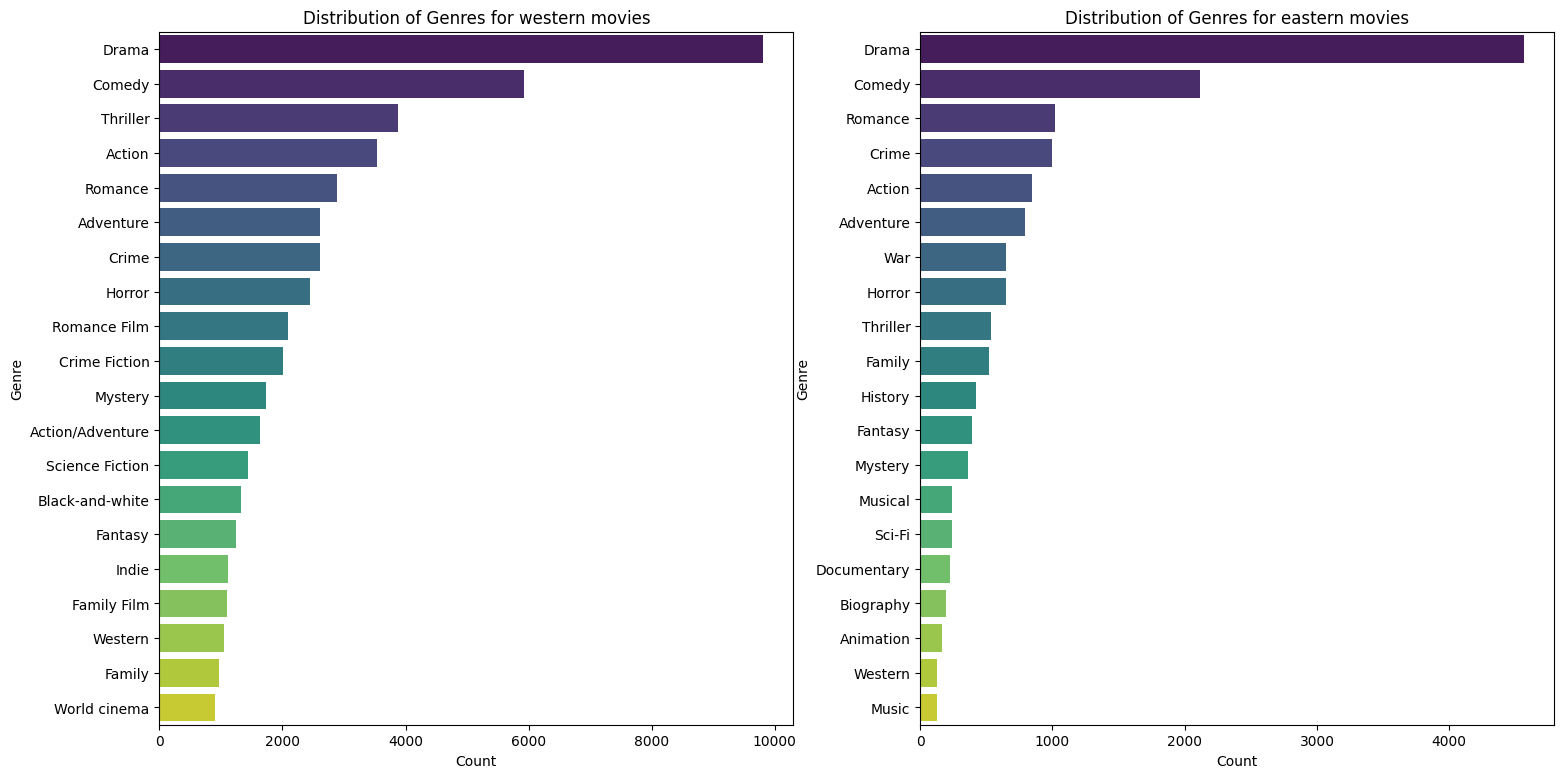

In [7]:
genres_df_western = pd.DataFrame()
# change genres column from str to array
genres_df_western["genres"] = (
    Western_movies["genres"].fillna("[]").apply(ast.literal_eval)
)
genre_counts_western = genres_df_western["genres"].explode().value_counts()

genres_df_eastern = pd.DataFrame()
# change genres column from str to array
genres_df_eastern["genres"] = (
    Eastern_movies["genres"].fillna("[]").apply(ast.literal_eval)
)
genre_counts_eastern = genres_df_eastern["genres"].explode().value_counts()


fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # 1 row, 2 columns

sns.barplot(
    x=genre_counts_western.head(20).values,
    y=genre_counts_western.head(20).index,
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Distribution of Genres for western movies")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Genre")

sns.barplot(
    x=genre_counts_eastern.head(20).values,
    y=genre_counts_eastern.head(20).index,
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title("Distribution of Genres for eastern movies")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Genre")

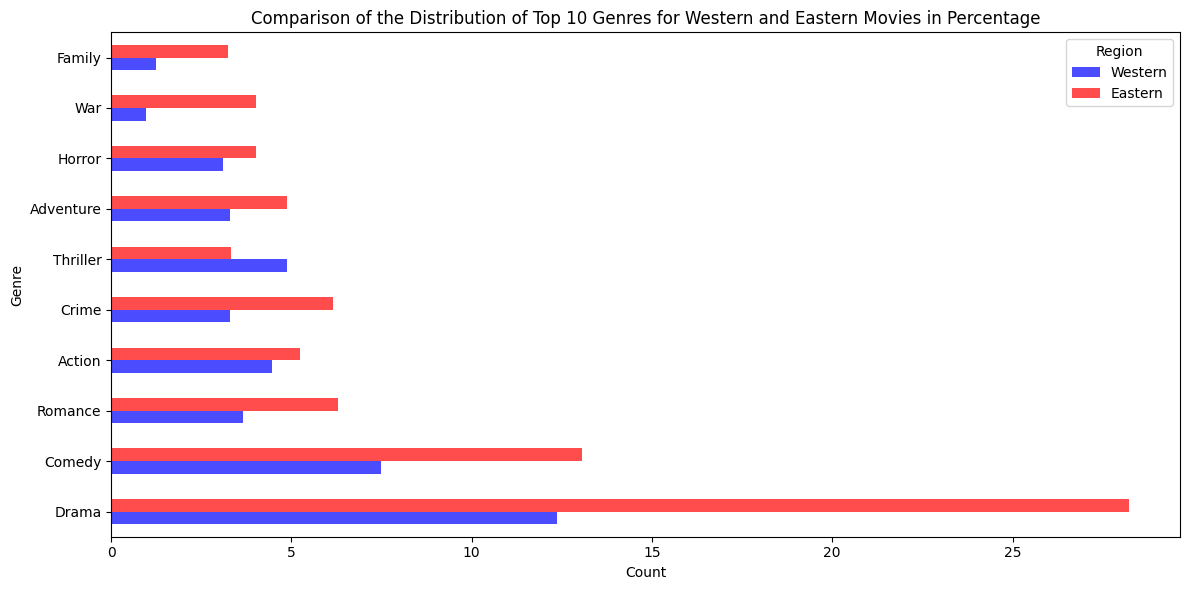

In [8]:
genre_comparison = pd.DataFrame(
    {"Western": genre_counts_western, "Eastern": genre_counts_eastern}
).fillna(0)

genre_comparison["Western"] = (
    genre_comparison["Western"] / genre_comparison["Western"].sum(axis=0) * 100
)
genre_comparison["Eastern"] = (
    genre_comparison["Eastern"] / genre_comparison["Eastern"].sum(axis=0) * 100
)

genre_comparison["total"] = genre_comparison.sum(axis=1)
genre_comparison["difference"] = (
    genre_comparison["Western"] - genre_comparison["Eastern"]
)

common_genres = (
    genre_comparison.sort_values("total", ascending=False)[["Western", "Eastern"]]
    .head(10)
    .index
)

# Plot stacked bar chart
genre_comparison.sort_values("total", ascending=False)[["Western", "Eastern"]].head(
    10
).plot(kind="barh", stacked=False, figsize=(12, 6), color=["blue", "red"], alpha=0.7)
plt.title(
    "Comparison of the Distribution of Top 10 Genres for Western and Eastern Movies in Percentage"
)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

In [9]:
# # Plot stacked bar chart
# genre_comparison.sort_values("difference", ascending=False)[
#     ["Western", "Eastern"]
# ].head(10).plot(
#     kind="barh", stacked=False, figsize=(12, 6), color=["blue", "red"], alpha=0.7
# )
# plt.title(
#     "Comparison of the Distribution of Top 10 Genres for Western and Eastern Movies in Percentage"
# )
# plt.xlabel("Count")
# plt.ylabel("Genre")
# plt.legend(title="Region")
# plt.tight_layout()
# plt.show()

In [10]:
df = pd.DataFrame()
df["countries"] = movies_df["countries"].fillna("[]").apply(ast.literal_eval)
df["genres"] = movies_df["genres"].fillna("[]").apply(ast.literal_eval)

df = df.explode("countries").explode("genres")

most_common_genre = (
    df.groupby("countries")["genres"]
    .apply(lambda x: x.value_counts().idxmax())
    .reset_index(name="most_common_genre")
)

most_common_genre

,countries,most_common_genre
0,Afghanistan,World cinema
1,Albania,Drama
2,Algeria,Drama
3,Angola,Historical fiction
4,Argentina,Drama
...,...,...
146,Wales,Romance Film
147,West Germany,Drama
148,Yugoslavia,Drama
149,Zambia,Drama


## Map Plots

(np.float64(-198.0),
 np.float64(198.00000000000006),
 np.float64(-98.6822565),
 np.float64(92.3273865))

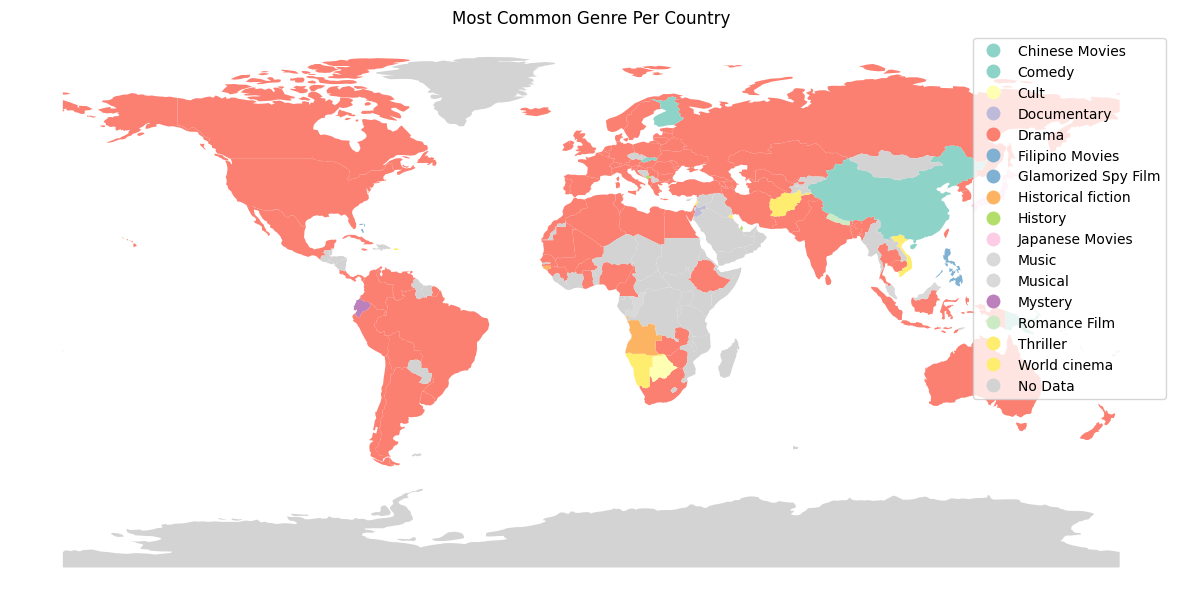

In [11]:
# need pip install geopandas
import geopandas as gpd

world = gpd.read_file("data/raw/NaturalEarth/ne_110m_admin_0_countries.shp")
world_genres = world.merge(
    most_common_genre, left_on="NAME", right_on="countries", how="left"
)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world_genres.plot(
    column="most_common_genre",  # Use the most_common_genre column for coloring
    cmap="Set3",  # Categorical color map
    legend=True,  # Add a legend
    missing_kwds={"color": "lightgrey", "label": "No Data"},  # Handle missing data
    ax=ax,
)

ax.set_title("Most Common Genre Per Country")
ax.axis("off")

In [12]:
df = pd.DataFrame()
df["countries"] = movies_df["countries"].fillna("[]").apply(ast.literal_eval)
df["genres"] = movies_df["genres"].fillna("[]").apply(ast.literal_eval)
df["release_date"] = (
    movies_df["release_date"].fillna("").apply(lambda x: int(str(x)[:4]))
)

df = df.explode("countries").explode("genres").dropna()

most_common_genre = (
    df.groupby(["countries", "release_date"])["genres"]
    .apply(lambda x: x.value_counts().idxmax())
    .reset_index(name="most_common_genre")
)

most_common_genre

,countries,release_date,most_common_genre
0,Afghanistan,1975,World cinema
1,Afghanistan,1983,Drama
2,Afghanistan,1992,Romance Film
3,Albania,1958,Drama
4,Albania,1977,Drama
...,...,...,...
2536,Zimbabwe,1976,Action
2537,Zimbabwe,1985,Parody
2538,Zimbabwe,1987,Comedy
2539,Zimbabwe,1988,Drama


In [13]:
# need pip install plotly
import plotly.express as px

world_genres = world.merge(
    most_common_genre, left_on="NAME", right_on="countries", how="left"
).sort_values("release_date")

# Create an interactive map using Plotly
fig = px.choropleth(
    world_genres,
    locations="ISO_A3",  # Country name
    color="most_common_genre",  # Most common genre
    hover_name="NAME",  # Hover info
    hover_data=[
        "most_common_genre",
        "release_date",
    ],  # Show genre and release date on hover
    color_discrete_sequence=px.colors.qualitative.Set3,  # Color map for genres
    title="Most Common Genre by Country per year",
    animation_frame="release_date",
    width=1200,
    height=600,
)

fig.update_layout(dragmode=False)
# Show the plot
fig.show()

## Time Series


In [14]:
genres = pd.DataFrame()
genres["release_date"] = (
    Western_movies["release_date"].apply(lambda x: str(x)[:4]).astype(int)
)
genres["genres"] = Western_movies["genres"]
genres = genres.dropna()

genres["genres"] = genres["genres"].apply(ast.literal_eval)
genres_counts = genres.explode("genres")
genres_counts.groupby("release_date").value_counts()

release_date  genres         
1945          Drama              124
              Comedy              85
              Black-and-white     72
              Thriller            53
              Romance             52
                                ... 
1995          Stop motion          1
              Superhero            1
              Superhero movie      1
              Z movie              1
              Zombie Film          1
Name: count, Length: 7390, dtype: int64

In [15]:
def get_genres_per_year(movies):
    genres = pd.DataFrame()
    genres["release_date"] = (
        movies["release_date"].apply(lambda x: str(x)[:4]).astype(int)
    )
    genres["genres"] = movies["genres"]
    genres = genres.dropna()

    genres["genres"] = genres["genres"].apply(ast.literal_eval)
    genres_counts = genres.explode("genres")
    genres_counts = genres_counts.groupby("release_date").value_counts()

    return genres_counts


western_genres_counts = get_genres_per_year(Western_movies)
eastern_genres_counts = get_genres_per_year(Eastern_movies)

In [16]:
common_genres

Index(['Drama', 'Comedy', 'Romance', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Horror', 'War', 'Family'],
      dtype='object', name='genres')

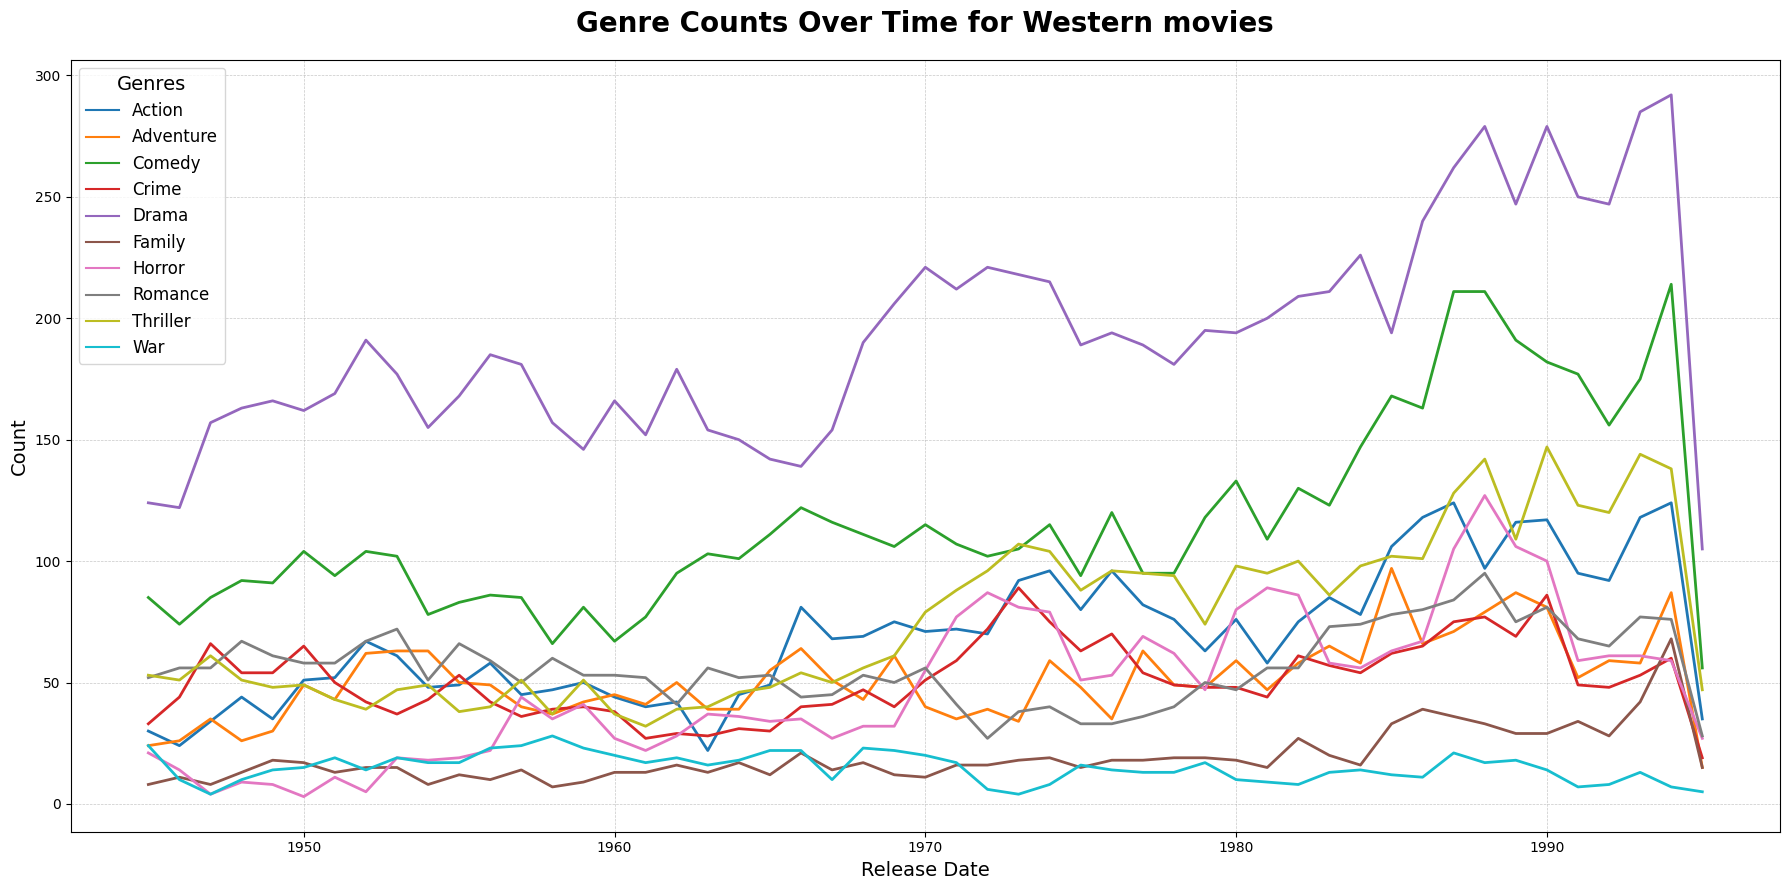

In [17]:
def line_plot_genres(side_genres_counts, side):
    df_test = side_genres_counts.reset_index()[
        side_genres_counts.reset_index()["genres"].isin(common_genres)
    ].pivot(index="release_date", values="count", columns="genres")
    fig, ax = plt.subplots(figsize=(18, 9))
    df_test.plot(ax=ax)

    ax.set_title(
        f"Genre Counts Over Time for {side} movies",
        fontsize=20,
        fontweight="bold",
        pad=20,
    )
    ax.set_xlabel("Release Date", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)
    ax.legend(title="Genres", fontsize=12, title_fontsize=14)

    # Improve line clarity
    for line in ax.get_lines():
        line.set_linewidth(2)  # Increase line width

    plt.tight_layout()


line_plot_genres(western_genres_counts, "Western")

In [27]:
def px_line_plot_genres(side_genres_counts, side):
    df_test = side_genres_counts.reset_index()[
        side_genres_counts.reset_index()["genres"].isin(common_genres)
    ].pivot(index="release_date", values="count", columns="genres")
    df_long = df_test.reset_index().melt(
        id_vars="release_date", var_name="Genre", value_name="Count"
    )
    # Create the interactive line plot
    fig = px.line(
        df_long,
        x="release_date",
        y="Count",
        color="Genre",
        title=f"Genre Counts Over Time for {side} Movies",
        labels={"release_date": "Release Date", "Count": "Count", "Genre": "Genres"},
        template="plotly_white",
    )

    # Update layout for better clarity
    fig.update_layout(
        title_font_size=24,
        legend_title_font_size=14,
        legend_font_size=12,
        xaxis_title_font_size=16,
        yaxis_title_font_size=16,
        hovermode="x unified",  # Align hover labels across genres
    )

    # Make the lines clearer
    fig.update_traces(line=dict(width=2))
    # Make all traces except one invisible by default
    fig.for_each_trace(
        lambda trace: (
            trace.update(visible="legendonly")
            if trace.name != df_long["Genre"].iloc[0]
            else None
        )
    )

    # add vietnam war region
    fig.add_vrect(
        x0="1955",
        x1="1970",
        label=dict(
            text="Vietnam War",
            textposition="top center",
            font=dict(size=20, family="Times New Roman"),
        ),
        fillcolor="red",
        opacity=0.25,
        line_width=0,
    )

    # add Cuban Missle Crisis
    fig.add_vline(
        x="1962",
        label=dict(
            text="Cuban Missile Crisis",
            textposition="top left",
            font=dict(size=15, family="Times New Roman"),
        ),
        line_color="green",
        line_dash="dash",
        opacity=1,
        line_width=1,
    )
    fig.show()


px_line_plot_genres(western_genres_counts, "Western")

In [19]:
px_line_plot_genres(eastern_genres_counts, "Eastern")

In [20]:
from ipywidgets import interact, Dropdown


# Interactive widget
def interactive_plot(side_genres):
    if side_genres == "Western":
        px_line_plot_genres(western_genres_counts, "Western")
    elif side_genres == "Eastern":
        px_line_plot_genres(eastern_genres_counts, "Eastern")


# Use interact with a dropdown
interact(
    interactive_plot,
    side_genres=Dropdown(
        options=["Western", "Eastern"], value="Western", description="Region"
    ),
)

interactive(children=(Dropdown(description='Region', options=('Western', 'Eastern'), value='Western'), Output(…

<function __main__.interactive_plot(side_genres)>

In [21]:
fig = px.bar(
    western_genres_counts.reset_index().sort_values("release_date", ascending=True)[
        western_genres_counts.reset_index()["genres"].isin(common_genres)
    ],
    x="count",
    y="genres",
    animation_frame="release_date",
    range_x=[0, 400],
    color="genres",
    orientation="h",
)

# animation speed (lower = faster)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500

fig.show()

C:\Users\karim\AppData\Local\Temp\ipykernel_22168\47062303.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [22]:
western_genres_counts.reset_index()

,release_date,genres,count
0,1945,Drama,124
1,1945,Comedy,85
2,1945,Black-and-white,72
3,1945,Thriller,53
4,1945,Romance,52
...,...,...,...
7385,1995,Stop motion,1
7386,1995,Superhero,1
7387,1995,Superhero movie,1
7388,1995,Z movie,1


# Theme Analysis

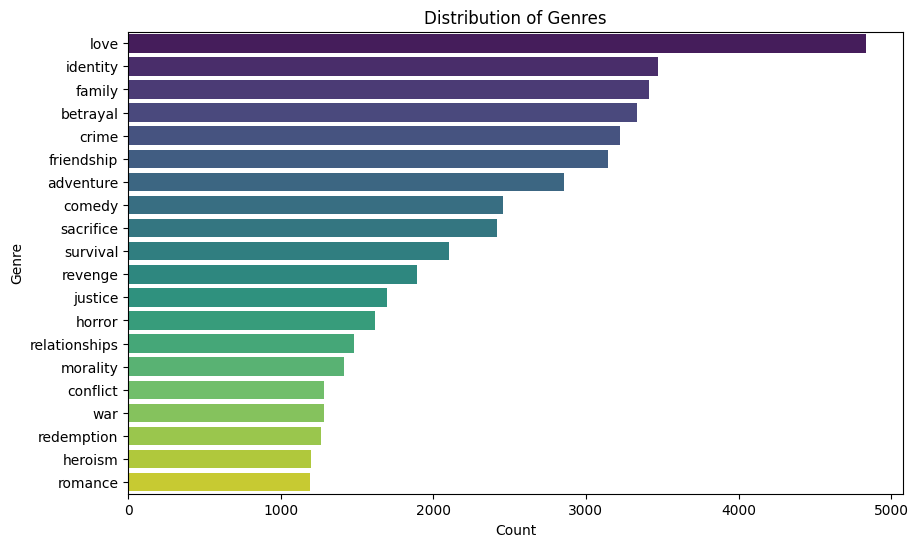

In [23]:
themes_df = pd.DataFrame()
themes_df["countries"] = movies_df["countries"]
themes_df["release_date"] = movies_df["year_release_date"]
themes_df["theme"] = movies_df["theme"].str.lower()
themes_df = themes_df.dropna()
themes_df["theme"] = themes_df["theme"].apply(ast.literal_eval)
themes_df["countries"] = themes_df["countries"].apply(ast.literal_eval)

theme_counts = (
    themes_df.explode("countries").explode("theme")["theme"].value_counts().head(20)
)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(
    x=theme_counts.values,
    y=theme_counts.index,
    palette="viridis",
    hue=theme_counts.index,
)
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [24]:
themes_df2 = themes_df.explode("theme").explode("countries")
western_themes_df = themes_df2[
    themes_df2["countries"].str.contains("|".join(Western_countries))
]
eastern_themes_df = themes_df2[
    themes_df2["countries"].str.contains("|".join(Eastern_countries))
]

Text(0, 0.5, 'Theme')

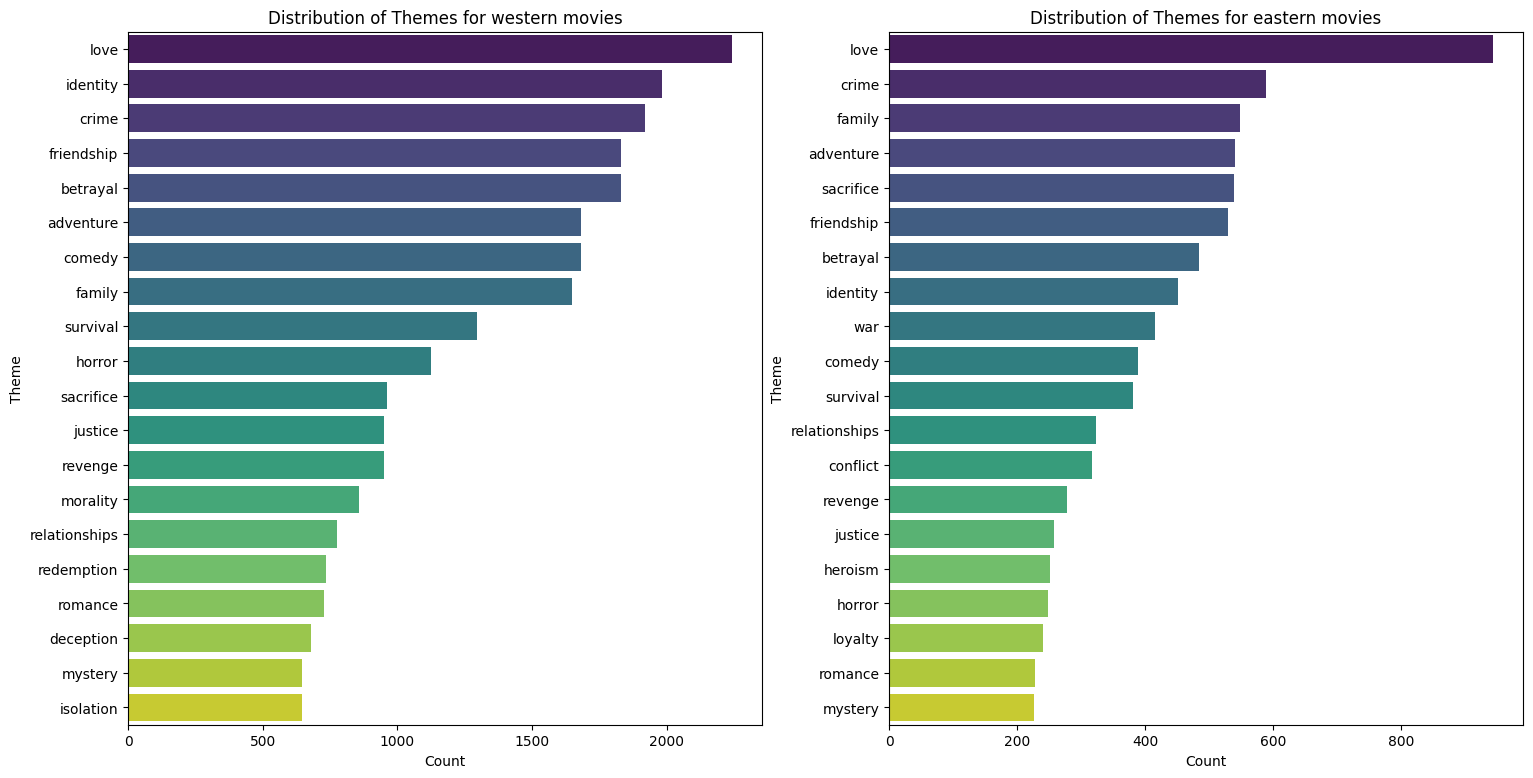

In [25]:
western_theme_counts = western_themes_df["theme"].value_counts()
eastern_theme_counts = eastern_themes_df["theme"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # 1 row, 2 columns

sns.barplot(
    x=western_theme_counts.head(20).values,
    y=western_theme_counts.head(20).index,
    hue=western_theme_counts.head(20).index,
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Distribution of Themes for western movies")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Theme")

sns.barplot(
    x=eastern_theme_counts.head(20).values,
    y=eastern_theme_counts.head(20).index,
    hue=eastern_theme_counts.head(20).index,
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title("Distribution of Themes for eastern movies")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Theme")